#  Stock Prediction Of the Reliance Stock

## 📝 Project Summary

This project analyzes historical stock prices of Reliance Industries (RELIANCE.NS) using Python. 
We downloaded data from Yahoo Finance between 2015 and 2025, visualized price trends over time, 
and built a Linear Regression model to predict future stock prices.

The goal is to demonstrate how simple machine learning techniques can forecast stock prices 
based on past performance. The model was trained using the date (converted to ordinal) 
as the independent variable and closing price as the target.

We also visualized the model's predictions against actual prices to evaluate its performance.
This project highlights the power of data science in financial trend analysis and forecasting.


Step 1: Install Required Libraries 

In [2]:
!pip install yfinance pandas matplotlib scikit-learn


Step 2: Import Libraries

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


 Step 3: Download Reliance Stock Data

In [15]:
# Fetch Reliance Industries stock data from Yahoo Finance
df = yf.download('RELIANCE.NS', start='2015-01-01', end='2025-07-15')
df.reset_index(inplace=True)
df.head()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3900\743976388.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', start='2015-01-01', end='2025-07-15')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2015-01-01,190.758652,191.639510,189.845568,190.414914,2963643
1,2015-01-02,190.253754,192.509607,189.985208,190.801601,7331366
2,2015-01-05,188.169800,191.403188,187.793822,190.135610,10103941
3,2015-01-06,179.629791,187.557482,178.748934,186.912959,18627980
4,2015-01-07,183.539948,184.506740,179.823178,179.844662,20720312


Step 4: Visualize Stock Trend

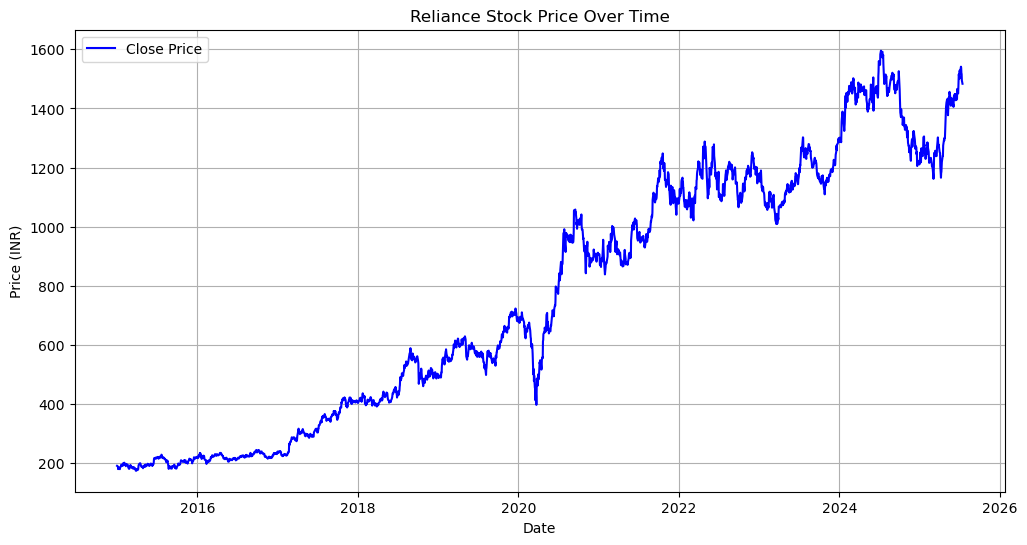

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Reliance Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

 Step 5: Predict Future Prices with Linear Regression

In [17]:
df['DateOrdinal'] = pd.to_datetime(df['Date']).map(pd.Timestamp.toordinal)
X = df[['DateOrdinal']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


Step 6: Visualize Actual vs Predicted

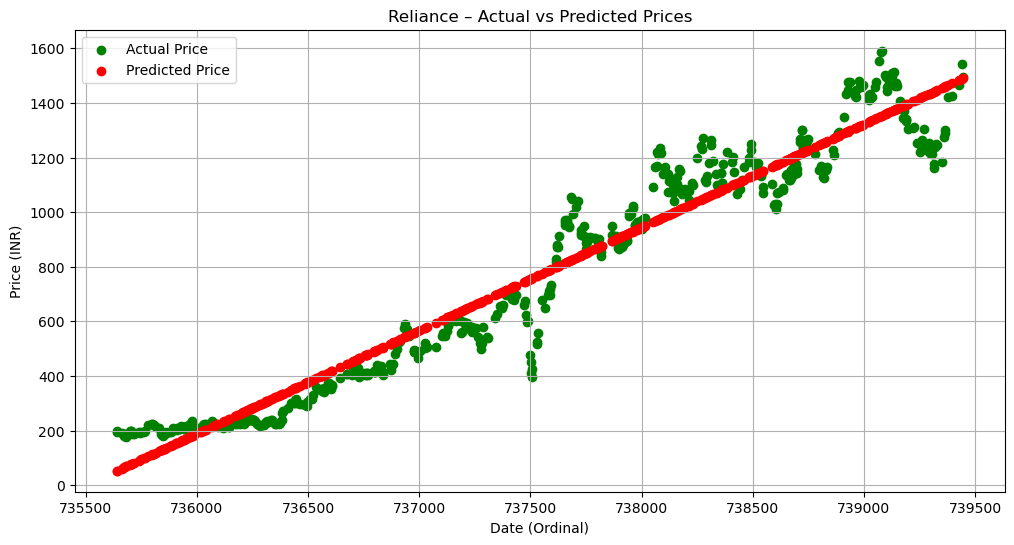

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='green', label='Actual Price')
plt.scatter(X_test, predictions, color='red', label='Predicted Price')
plt.title('Reliance – Actual vs Predicted Prices')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

If We want to prdict it by the manual date 

In [19]:
import datetime

# Step 1: Define the future prediction date
future_date = datetime.datetime(2027, 7, 24)

# Step 2: Convert date to ordinal format
future_date_ordinal = future_date.toordinal()
future_input = [[future_date_ordinal]]

# Step 3: Predict using the trained model
future_price = model.predict(future_input)

# Step 4: Print predicted price
print(f"📈 Predicted Reliance stock price on July 24, 2027: ₹{future_price[0].item():.2f}")


📈 Predicted Reliance stock price on July 24, 2027: ₹1770.88
